In [6]:
import pandas as pd

data = pd.read_csv('company_bankruptcy.csv')
print(data.head())

   Bankrupt?   ROA(C) before interest and depreciation before interest  \
0          1                                           0.370594          
1          1                                           0.464291          
2          1                                           0.426071          
3          1                                           0.399844          
4          1                                           0.465022          

    ROA(A) before interest and % after tax  \
0                                 0.424389   
1                                 0.538214   
2                                 0.499019   
3                                 0.451265   
4                                 0.538432   

    ROA(B) before interest and depreciation after tax  \
0                                           0.405750    
1                                           0.516730    
2                                           0.472295    
3                                           0.4577

 ROA(A) before interest and % after tax and  ROA(C) before interest and depreciation before interest correlation: 0.9401237079700807
 ROA(B) before interest and depreciation after tax and  ROA(C) before interest and depreciation before interest correlation: 0.9868494970182541
 Net Income to Total Assets and  ROA(C) before interest and depreciation before interest correlation: 0.8876695382909829
 ROA(C) before interest and depreciation before interest and  ROA(A) before interest and % after tax correlation: 0.9401237079700807
 ROA(B) before interest and depreciation after tax and  ROA(A) before interest and % after tax correlation: 0.9557406252835042
 Net Income to Total Assets and  ROA(A) before interest and % after tax correlation: 0.9615519166312979
 ROA(C) before interest and depreciation before interest and  ROA(B) before interest and depreciation after tax correlation: 0.9868494970182541
 ROA(A) before interest and % after tax and  ROA(B) before interest and depreciation after tax

/opt/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


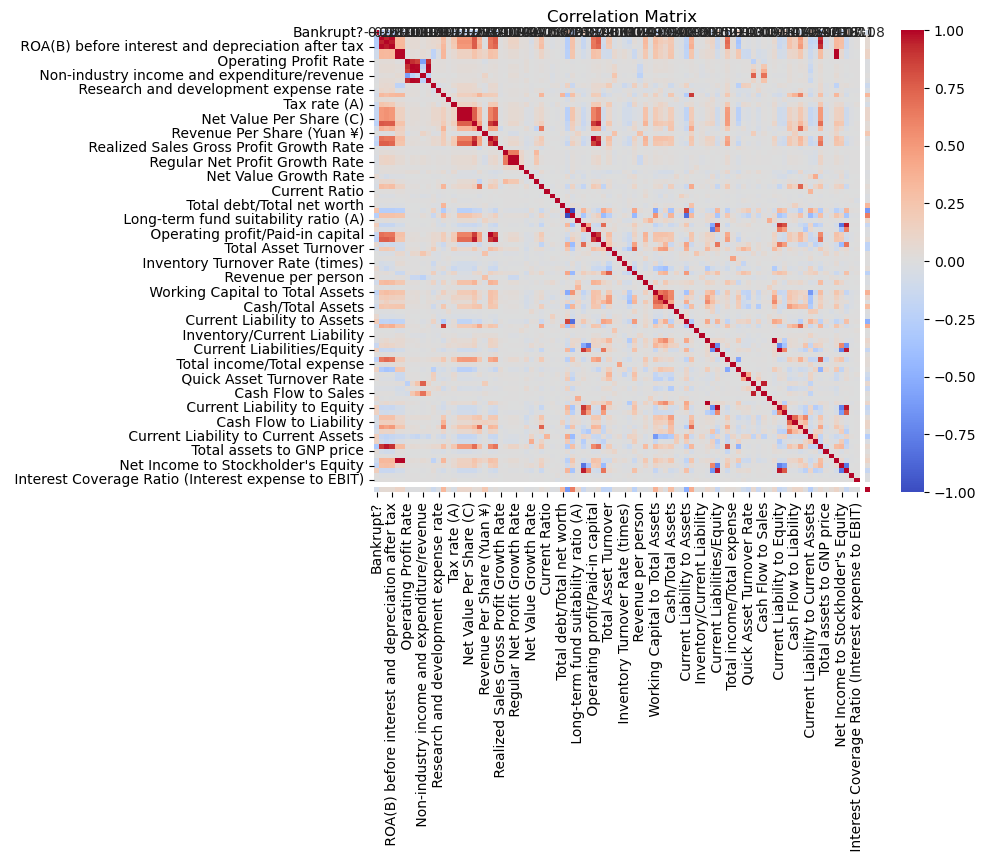

In [7]:
# analyze the data relationship
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = data.corr()

# print every column correlation that is over 0.8
for column in correlation_matrix.columns:
    for row in correlation_matrix.index:
        if correlation_matrix.loc[row, column] > 0.8 and row != column:
            print(f"{row} and {column} correlation: {correlation_matrix.loc[row, column]}")

# Plot a heatmap using seaborn.
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


Some of them are highly related because they are the same finiacial statement subject with or without tax.
For example, Continuous interest rate (after tax) &  Pre-tax net Interest Rate correlation.

Some of them are the same index with or without some devition.
For example, Operating profit/Paid-in capital & Operating Profit Per Share (Yuan ¥) correlation.

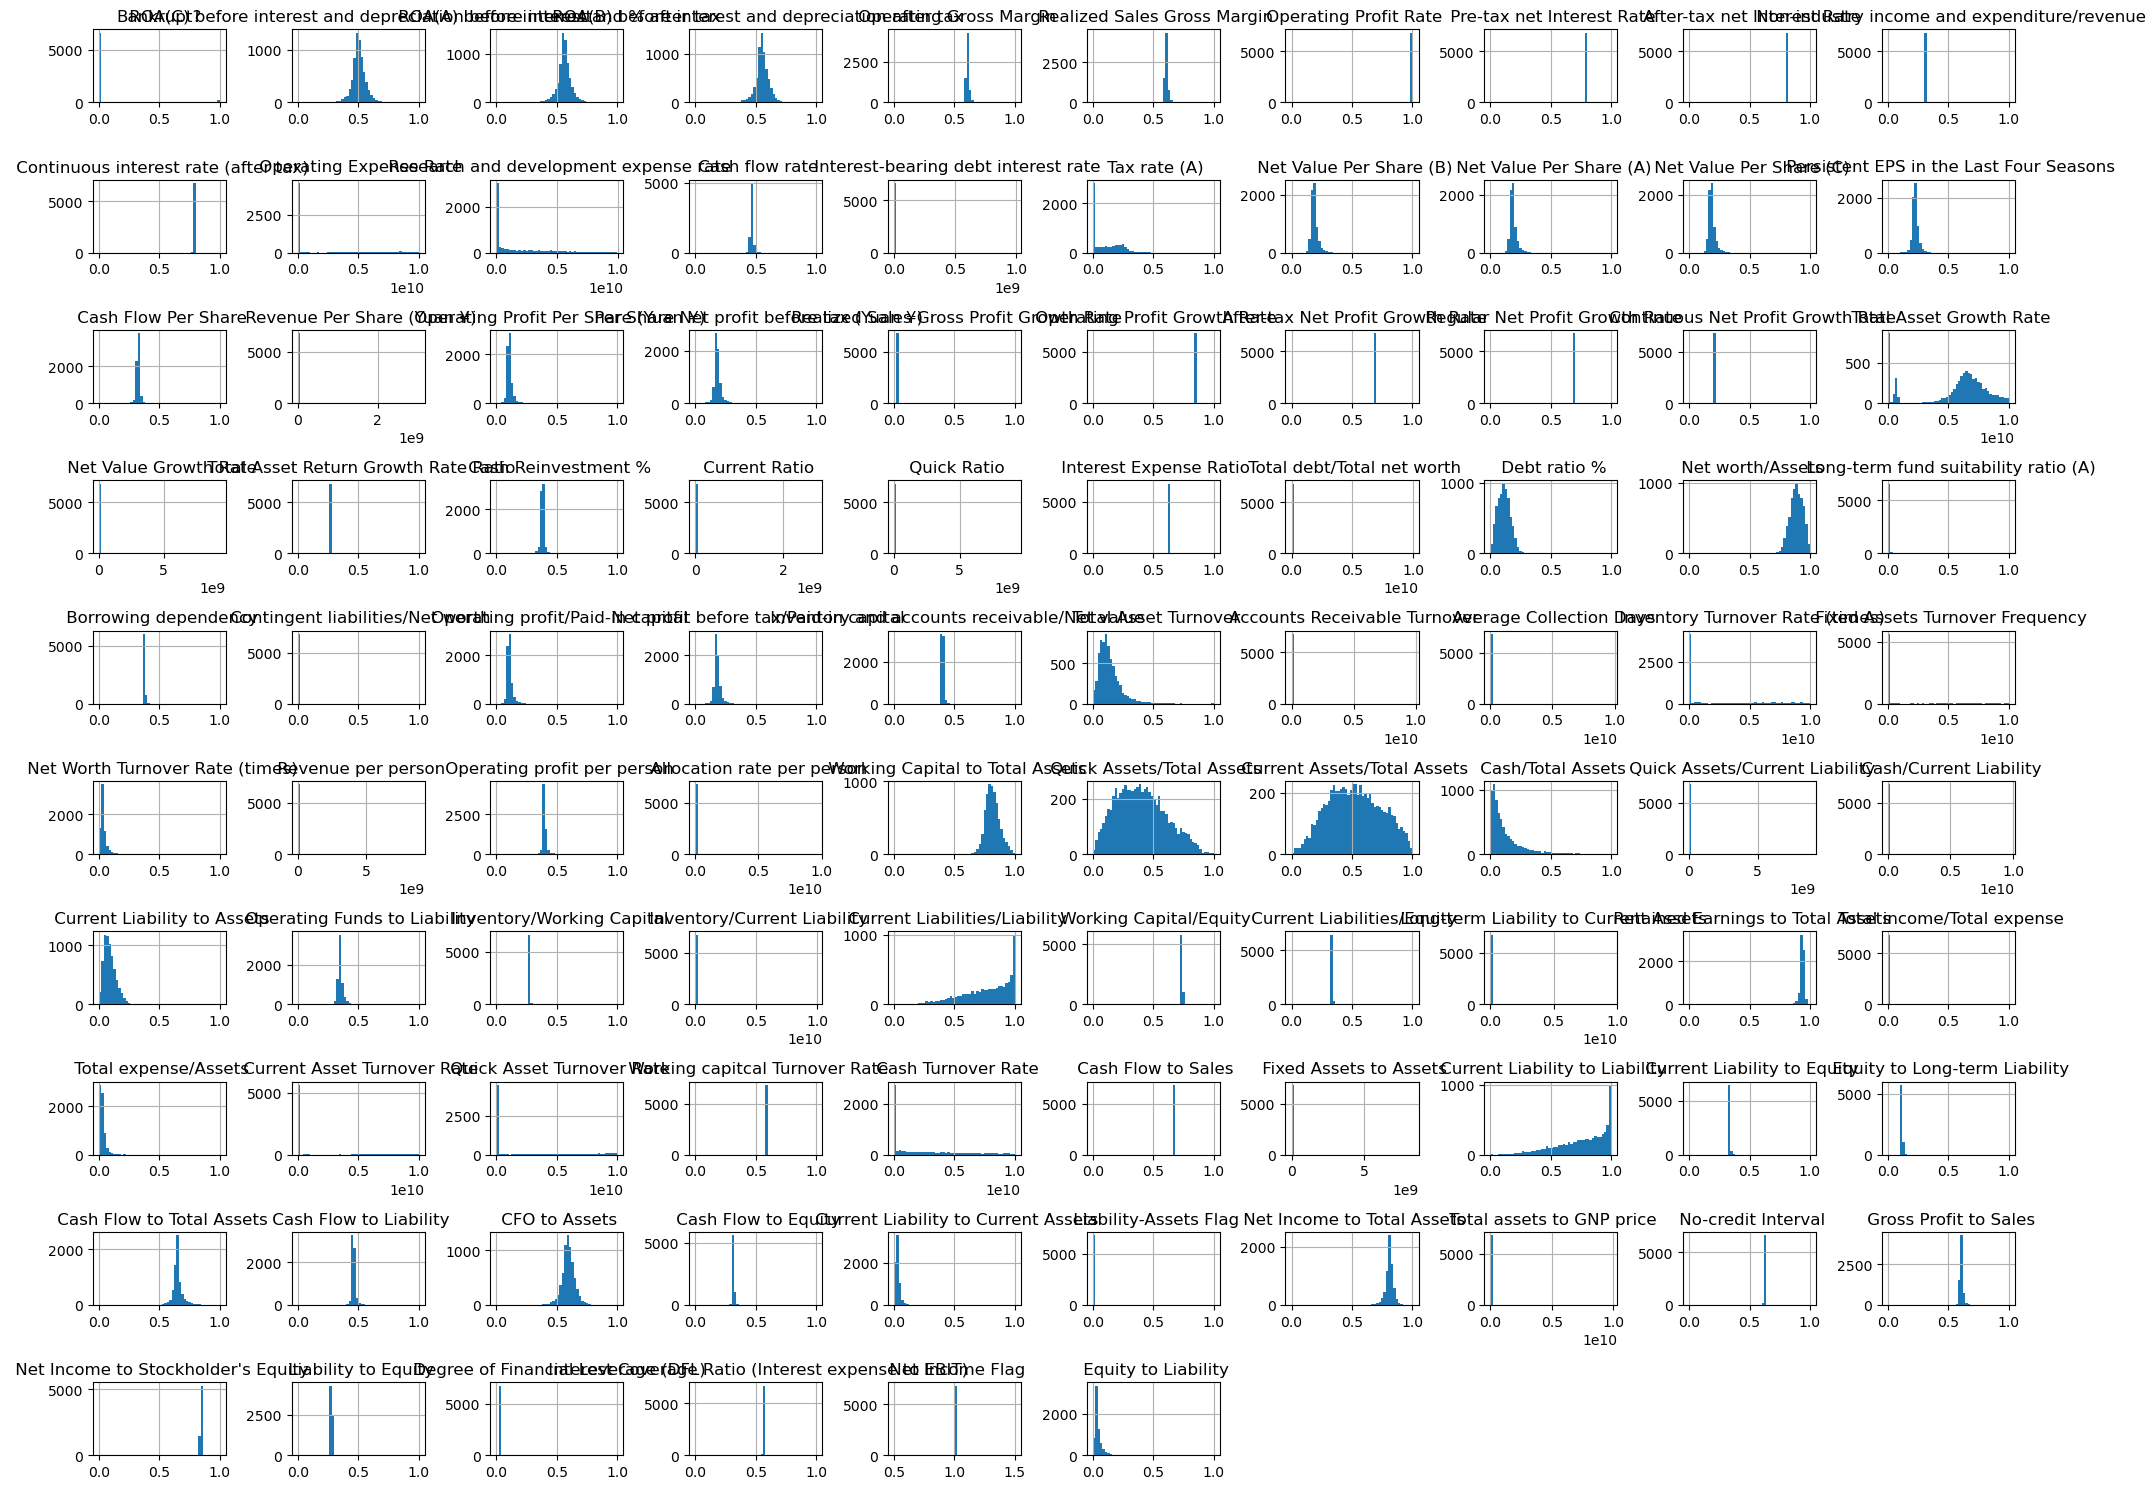

In [4]:
# observe the distribution of the data
data.hist(bins=50, figsize=(20, 15))
plt.tight_layout()
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/scipy/stats/_stats_py.py:4781: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


High positive correlation:
 Debt ratio %                           0.250161
 Borrowing dependency                   0.176543
 Current Liability to Assets            0.194494
 Current Liabilities/Equity             0.153828
 Total expense/Assets                   0.139049
 Current Liability to Equity            0.153828
 Equity to Long-term Liability          0.139014
 Current Liability to Current Assets    0.171306
 Liability-Assets Flag                  0.139212
 Liability to Equity                    0.166812
Name: Pearson Correlation, dtype: float64

Low negetive correlation:
 ROA(C) before interest and depreciation before interest   -0.260807
 ROA(A) before interest and % after tax                    -0.282941
 ROA(B) before interest and depreciation after tax         -0.273051
 Operating Gross Margin                                    -0.100043
 Realized Sales Gross Margin                               -0.099445
                                                              ...   


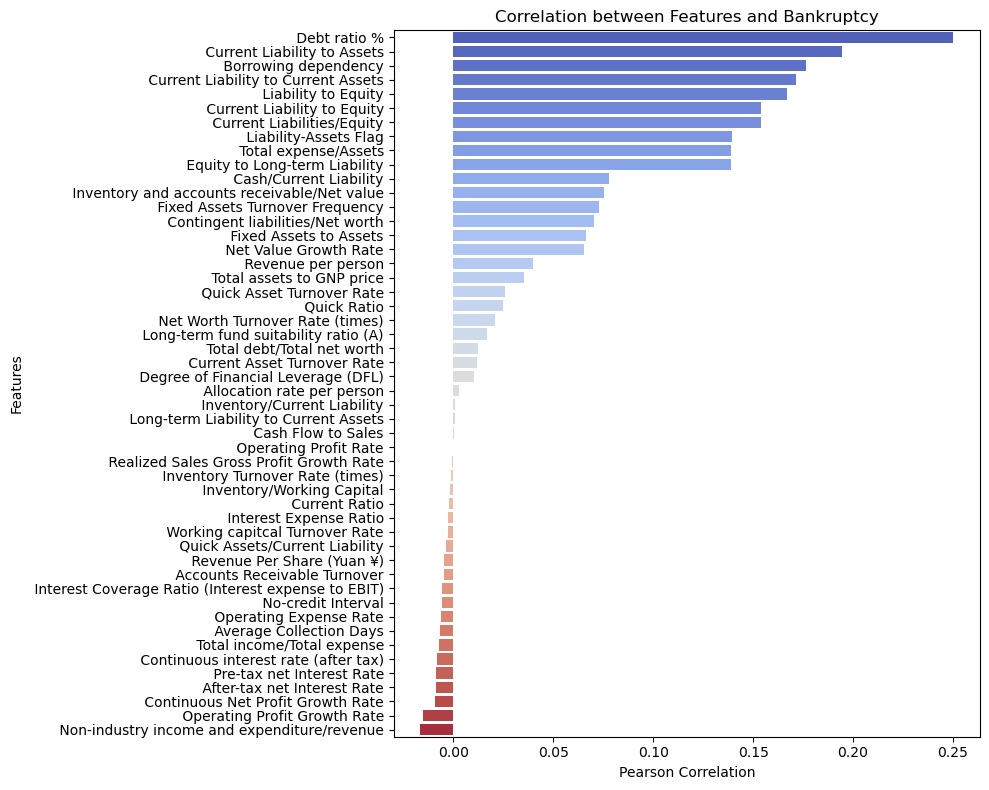

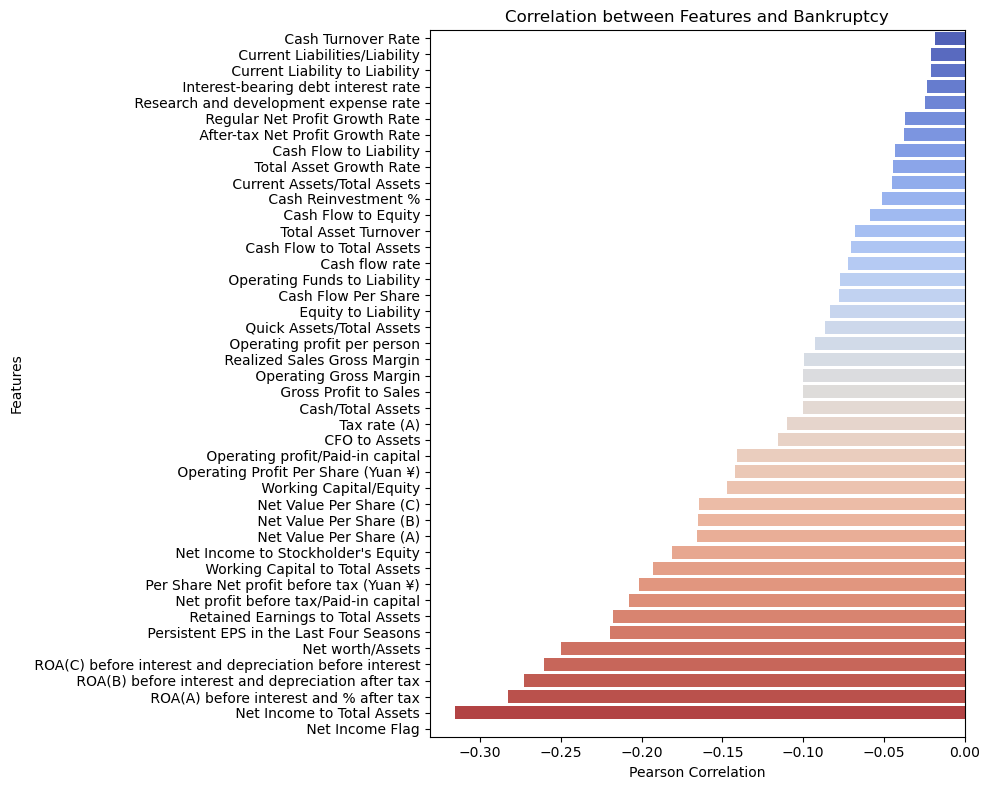

In [9]:
# observe the correlation between the Xs and Y
import pandas as pd
import numpy as np
from scipy.stats import pearsonr

y = 'Bankrupt?'

# Calculate the Pearson correlation coefficient between each feature and the target variable
correlation_dict = {}
for column in data.columns:
    if column != y:
        corr, _ = pearsonr(data[column], data[y])
        correlation_dict[column] = corr

# Convert the results to a DataFrame and sort by the absolute value of the correlation coefficient
correlation_df = pd.DataFrame.from_dict(correlation_dict, orient='index', columns=['Pearson Correlation'])

# print out those with high correlation
print("High positive correlation:")
print(correlation_df[correlation_df['Pearson Correlation'] > 0.1]['Pearson Correlation'])
print()
print("Low negetive correlation:")
print(correlation_df[correlation_df['Pearson Correlation'] < 0.1]['Pearson Correlation'])

# sort with the highest correlation
correlation_df = correlation_df.sort_values(by='Pearson Correlation', ascending=False)


# display the correlation in graph
plt.figure(figsize=(10, 8))
sns.barplot(x=correlation_df['Pearson Correlation'].iloc[:50].values, y=correlation_df.index[:50], palette='coolwarm')
plt.xlabel('Pearson Correlation')
plt.ylabel('Features')
plt.title('Correlation between Features and Bankruptcy')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 8))
sns.barplot(x=correlation_df['Pearson Correlation'].iloc[51:].values, y=correlation_df.index[51:], palette='coolwarm')
plt.xlabel('Pearson Correlation')
plt.ylabel('Features')
plt.title('Correlation between Features and Bankruptcy')
plt.tight_layout()
plt.show()


This part uses pearson correlation score to estimate the linear dependency of every X and Y(Bankercy?)